In [1]:
# installing necessary libraries
!pip install -U sentence-transformers persim ripser umap-learn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00
  C

### Let's fetch and tranform medical text data from 20newsgroups dataset

In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.datasets import fetch_20newsgroups

newsgroups_med = fetch_20newsgroups(subset='train', categories = ['sci.med'])

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings_med = model.encode(newsgroups_med['data'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings_med.shape

In [120]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import numpy as np

# PCA transformation
pca_2d = PCA(n_components=2)
med_pca_2d = pca_2d.fit_transform(embeddings_med)

pca_50d = PCA(n_components=50)
med_pca_50d = pca_50d.fit_transform(embeddings_med)

# t-SNE transformation
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, method='barnes_hut')
med_tsne_2d = tsne_2d.fit_transform(embeddings_med.astype(np.float32))

tsne_50d = TSNE(n_components=50, random_state=50, perplexity=30, method='exact')
med_tsne_50d = tsne_50d.fit_transform(embeddings_med.astype(np.float32))

# UMAP transformation
umap_2d = umap.UMAP(n_components=2, random_state=42)
med_umap_2d = umap_2d.fit_transform(embeddings_med)

umap_50d = umap.UMAP(n_components=50, random_state=42)
med_umap_50d = umap_50d.fit_transform(embeddings_med)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


## Let's get persistance diagrams of original embeddings vs emdeddings in reduced dimensions

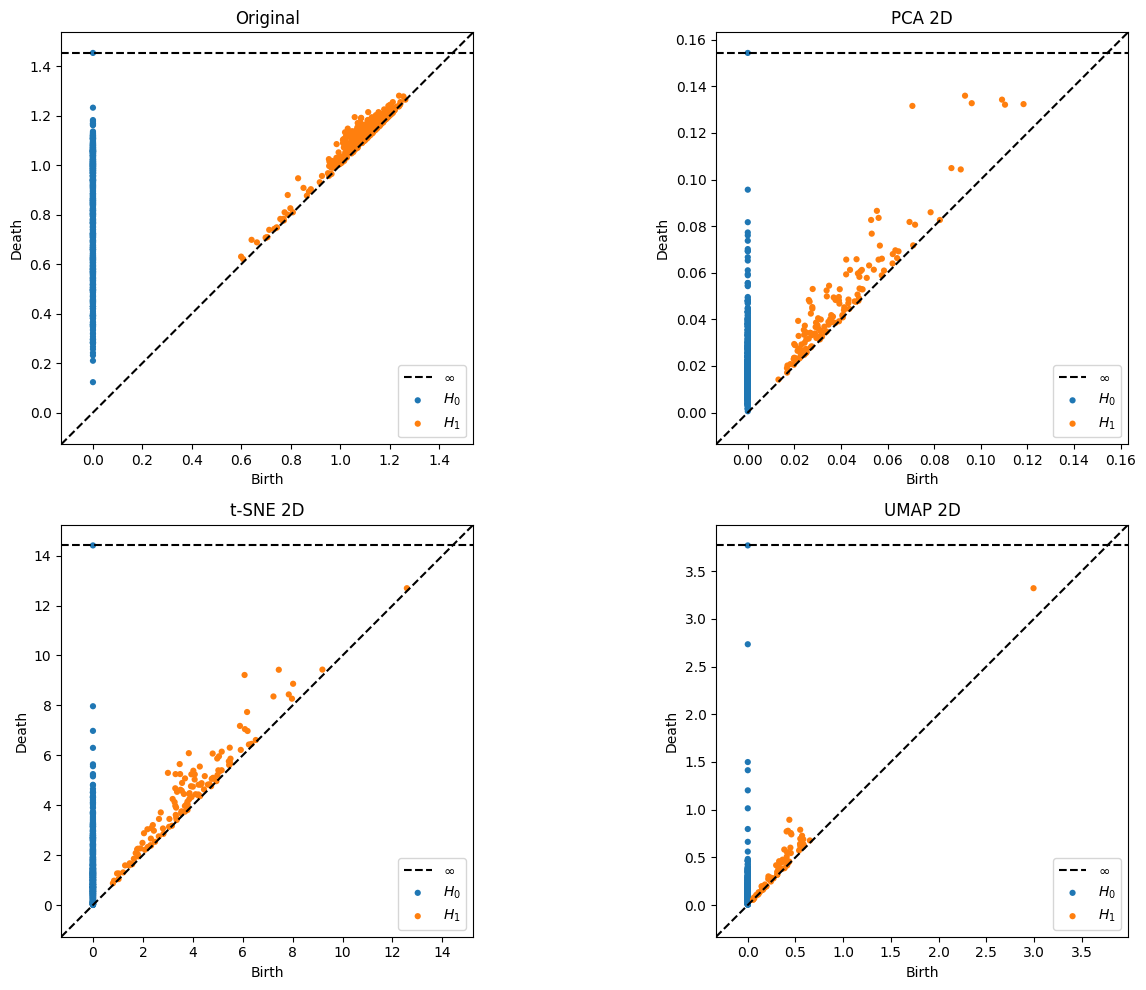

In [121]:
from persim import plot_diagrams
from ripser import ripser
import matplotlib.pyplot as plt

# Compute persistence diagrams
pers_orig_med = ripser(embeddings_med, do_cocycles=True)
pers_pca2d_med = ripser(med_pca_2d, do_cocycles=True)
pers_tsne2d_med = ripser(med_tsne_2d, do_cocycles=True)
pers_umap2d_med = ripser(med_umap_2d, do_cocycles=True)

# Set up plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # flatten 2x2 array to 1D list for easy iteration

# Titles and diagrams
titles = ['Original', 'PCA 2D', 't-SNE 2D', 'UMAP 2D']
dgms = [pers_orig_med['dgms'], pers_pca2d_med['dgms'],
        pers_tsne2d_med['dgms'], pers_umap2d_med['dgms']]

# Plot each diagram on its respective subplot
for ax, dgm, title in zip(axes, dgms, titles):
    plot_diagrams(dgm, ax=ax, show=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()


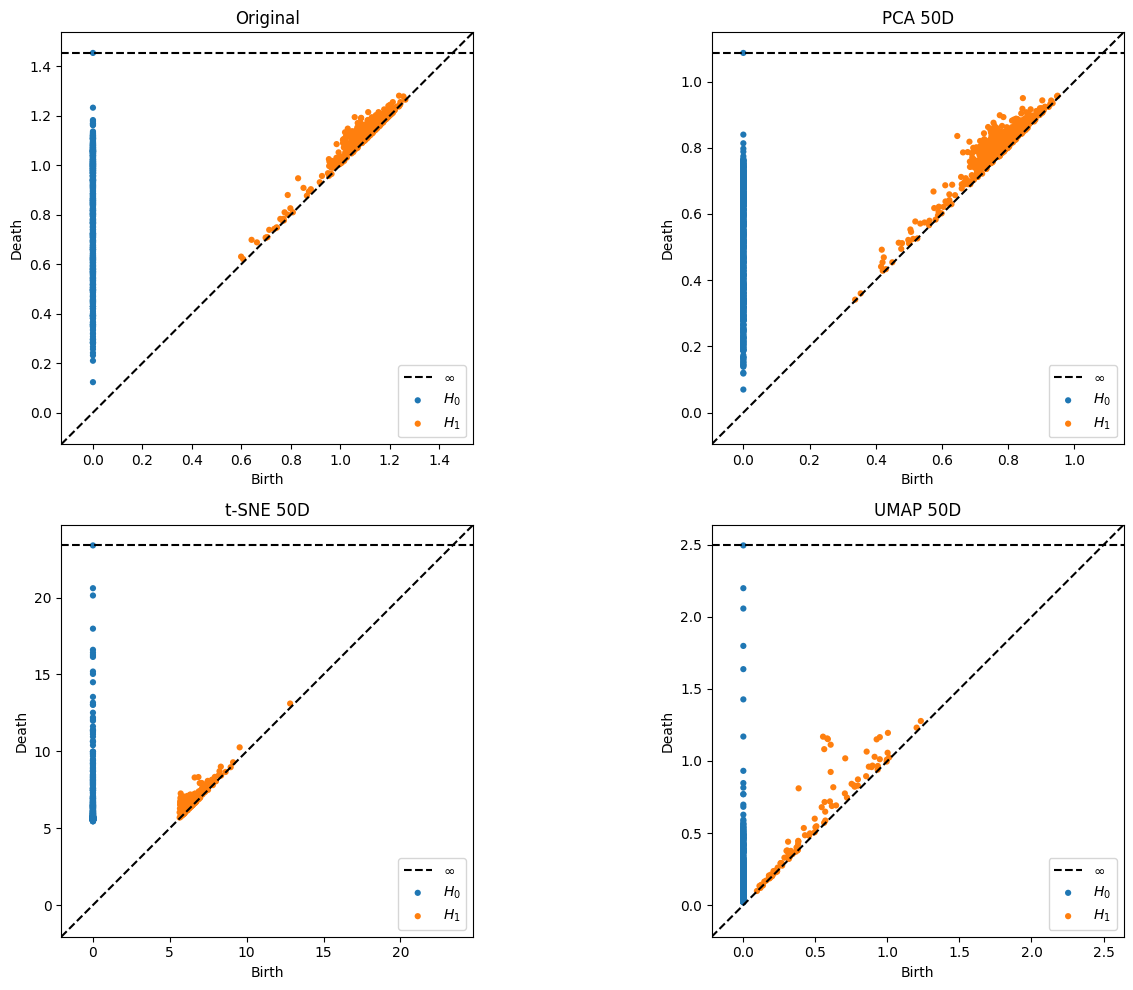

In [122]:
from persim import plot_diagrams
from ripser import ripser
import matplotlib.pyplot as plt

# Compute persistence diagrams
pers_orig_med = ripser(embeddings_med, do_cocycles=True)
pers_pca50d_med = ripser(med_pca_50d, do_cocycles=True)
pers_tsne50d_med = ripser(med_tsne_50d, do_cocycles=True)
pers_umap50d_med = ripser(med_umap_50d, do_cocycles=True)

# Set up plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # flatten 2x2 array to 1D list for easy iteration

# Titles and diagrams
titles = ['Original', 'PCA 50D', 't-SNE 50D', 'UMAP 50D']
dgms = [pers_orig_med['dgms'], pers_pca50d_med['dgms'],
        pers_tsne50d_med['dgms'], pers_umap50d_med['dgms']]

# Plot each diagram on its respective subplot
for ax, dgm, title in zip(axes, dgms, titles):
    plot_diagrams(dgm, ax=ax, show=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()


### Analysis of H0 features





In [123]:
from scipy.spatial.distance import pdist, squareform
from ripser import ripser
from sklearn.metrics import jaccard_score
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

def build_clusters(distance_matrix, threshold):
    G = nx.Graph()
    n = distance_matrix.shape[0]
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i + 1, n):
            if distance_matrix[i, j] < threshold:
                G.add_edge(i, j)
    return list(nx.connected_components(G))


def jaccard_index(set1, set2, n):
    a = np.zeros(n)
    b = np.zeros(n)
    for i in set1: a[i] = 1
    for i in set2: b[i] = 1
    return jaccard_score(a, b)

def compare_persistent_clusters(embeddings_hd, embeddings_reduced, k=5):

  D_hd = squareform(pdist(embeddings_hd)) # original space
  D_pca = squareform(pdist(embeddings_reduced))    # 2D PCA space

  result_hd = ripser(D_hd, distance_matrix=True, maxdim=0)
  result_pca = ripser(D_pca, distance_matrix=True, maxdim=0)


  dgms_hd = result_hd['dgms'][0]   # H₀ diagram for original D
  dgms_pca = result_pca['dgms'][0] # H₀ diagram for 2D PCA

  k = 5  # top 5 most persistent features

  persist_hd = dgms_hd[:,1] - dgms_hd[:,0]
  persist_pca = dgms_pca[:,1] - dgms_pca[:,0]

  top_hd = np.argsort(-persist_hd)[:k]
  top_pca = np.argsort(-persist_pca)[:k]

  death_thresholds_hd = dgms_hd[top_hd, 1]
  death_thresholds_pca = dgms_pca[top_pca, 1]

  clusters_hd = [build_clusters(D_hd, t) for t in death_thresholds_hd]
  clusters_pca = [build_clusters(D_pca, t) for t in death_thresholds_pca]

  # Flatten all point indices from top-k clusters
  points_hd_sets = [set().union(*clusters) for clusters in clusters_hd]
  points_pca_sets = [set().union(*clusters) for clusters in clusters_pca]

  points_hd_sets = [set(cluster) for clusters in clusters_hd for cluster in clusters]

  n_points = embeddings_med.shape[0]
  jaccard_matrix = np.zeros((k, k))

  for i in range(k):
      for j in range(k):
          jaccard_matrix[i, j] = jaccard_index(points_hd_sets[i], points_pca_sets[j], n_points)

  return jaccard_matrix



In [124]:
jac_matrix_pca_2d = compare_persistent_clusters(embeddings_med, med_pca_2d, k=5)
jac_matrix_pca_50d = compare_persistent_clusters(embeddings_med, med_pca_50d, k=5)
jac_matrix_tsne_2d = compare_persistent_clusters(embeddings_med, med_tsne_2d, k=5)
jac_matrix_tsne_50d = compare_persistent_clusters(embeddings_med, med_tsne_50d, k=5)
jac_matrix_umap_2d = compare_persistent_clusters(embeddings_med, med_umap_2d, k=5)
jac_matrix_umap_50d = compare_persistent_clusters(embeddings_med, med_umap_50d, k=5)


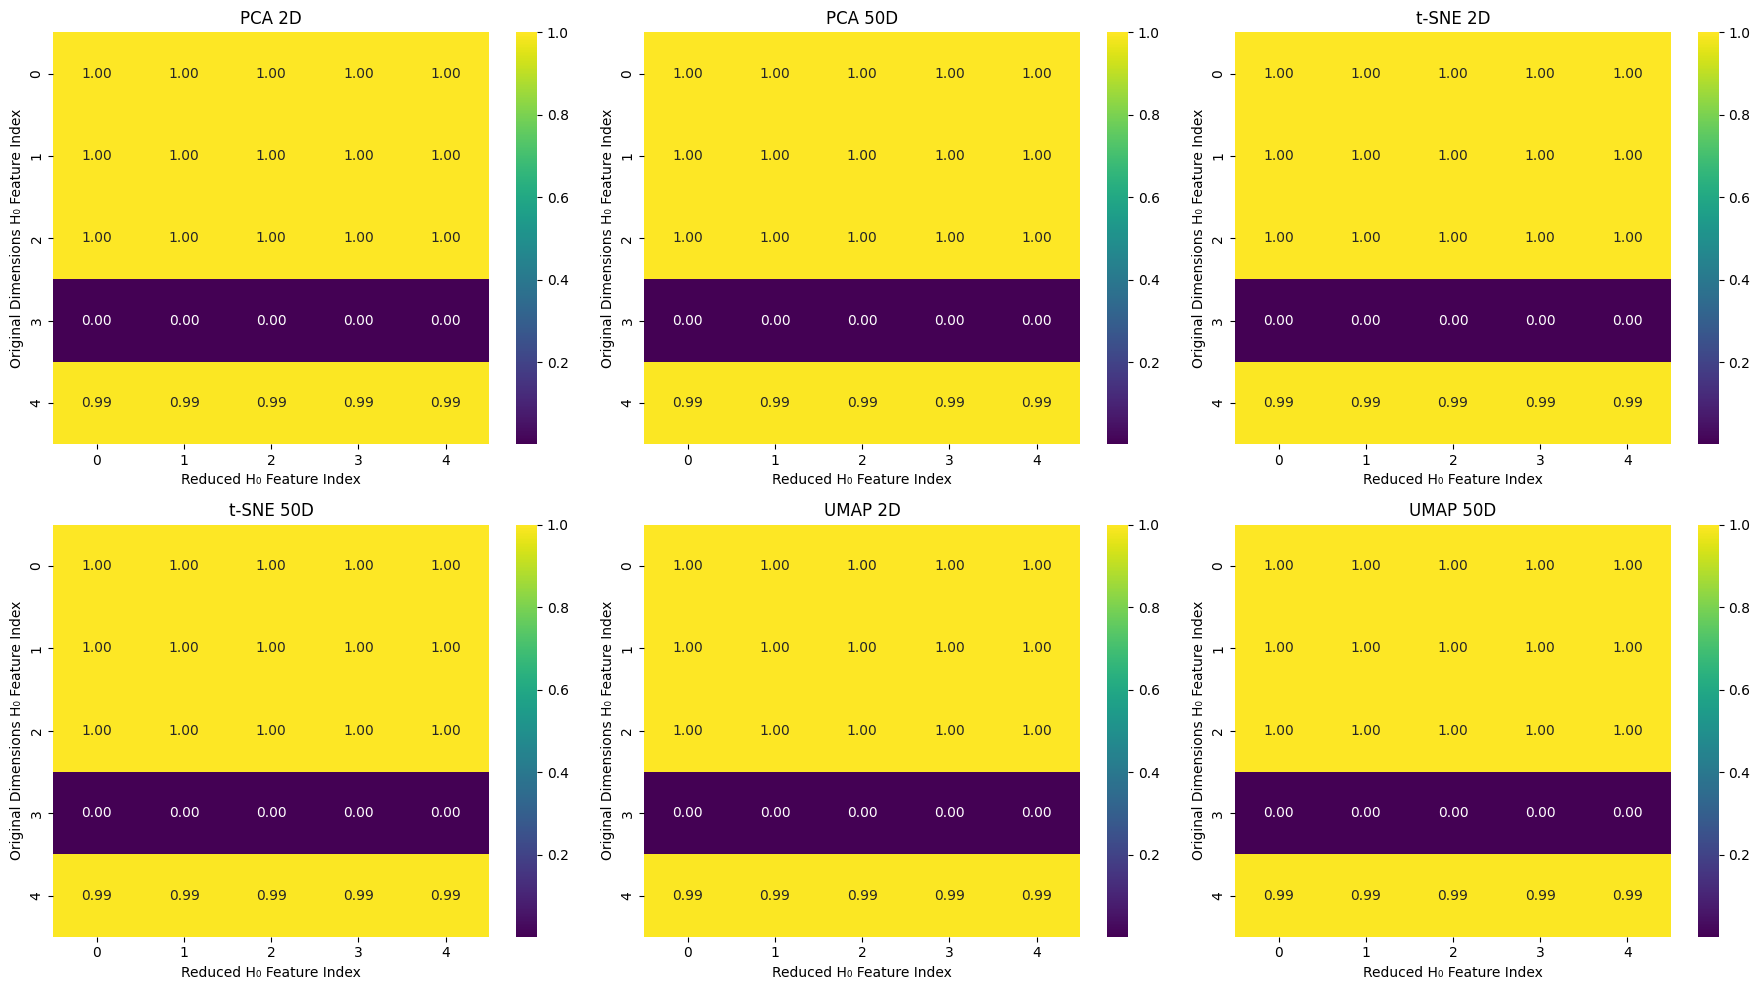

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

matrices = [jac_matrix_pca_2d, jac_matrix_pca_50d, jac_matrix_tsne_2d,
            jac_matrix_tsne_50d, jac_matrix_umap_2d, jac_matrix_umap_50d]  # Replace with actual matrices

titles = [
    "PCA 2D", "PCA 50D", "t-SNE 2D",
    "t-SNE 50D", "UMAP 2D", "UMAP 50D"
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for ax, mat, title in zip(axes.flat, matrices, titles):
    sns.heatmap(mat, ax=ax, annot=True, fmt=".2f", cmap="viridis")
    ax.set_title(title)
    ax.set_xlabel("Reduced H₀ Feature Index")
    ax.set_ylabel("Original Dimensions H₀ Feature Index")

plt.tight_layout()
plt.show()

# Analysis of H1 features

In [126]:
from collections import defaultdict

def extract_point_ids_from_cocycle(cocycle):
    point_ids = set()
    for i, j, _ in cocycle:
        point_ids.add(i)
        point_ids.add(j)
    return point_ids

def build_point_to_loop_map(loop_participation_list):
    point_map = defaultdict(list)
    for loop_idx, point_set in enumerate(loop_participation_list):
        for point in point_set:
            point_map[point].append(loop_idx)
    return point_map

def set_to_binary_vector(point_set, size):
    vec = np.zeros(size)
    vec[list(point_set)] = 1
    return vec

def get_comparison_data(emeddings_hd, emdeddings_rd, k=5):

  point_ids = np.arange(emeddings_hd.shape[0])

  result_hd = ripser(emeddings_hd, maxdim=1, do_cocycles=True)
  result_pca = ripser(emdeddings_rd, maxdim=1, do_cocycles=True)

  dgms_hd = result_hd['dgms'][1]
  dgms_pca = result_pca['dgms'][1]

  cocycles_hd = result_hd['cocycles'][1]
  cocycles_pca = result_pca['cocycles'][1]

  # Sort features by persistence
  persistence_hd = dgms_hd[:,1] - dgms_hd[:,0]
  top_hd_indices = np.argsort(-persistence_hd)[:k]

  point_participation_hd = [extract_point_ids_from_cocycle(cocycles_hd[i]) for i in top_hd_indices]

  # Sort features by persistence
  persistence_ld = dgms_pca[:,1] - dgms_pca[:,0]
  top_ld_indices = np.argsort(-persistence_ld)[:k]

  point_participation_rd = [extract_point_ids_from_cocycle(cocycles_pca[i]) for i in top_ld_indices]

  map_hd = build_point_to_loop_map(point_participation_hd)
  map_pca = build_point_to_loop_map(point_participation_rd)

  n_points = emeddings_hd.shape[0]
  comparison_data = []

  for point_id in range(n_points):
      loops_in_hd = map_hd.get(point_id, [])
      loops_in_pca = map_pca.get(point_id, [])

      comparison_data.append({
          "id": point_id,
          "in_hd": len(loops_in_hd),
          "in_pca": len(loops_in_pca),
        # "overlap": len(loops_in_hd & loops_in_pca),  # how many loops they share
          "consistent": loops_in_hd == loops_in_pca,   # exact match (optional)
          "lost_role": len(loops_in_hd) > 0 and len(loops_in_pca) == 0,
          "gained_role": len(loops_in_hd) == 0 and len(loops_in_pca) > 0
      })


  # Store results as a matrix: rows = loops in HD, cols = loops in PCA
  jaccard_matrix = np.zeros((len(point_participation_hd), len(point_participation_rd)))

  for i, hd_loop in enumerate(point_participation_hd):
      v_hd = set_to_binary_vector(hd_loop, n_points)
      for j, pca_loop in enumerate(point_participation_pca):
          v_pca = set_to_binary_vector(pca_loop, n_points)
          jaccard_matrix[i, j] = jaccard_score(v_hd, v_pca)

  return pd.DataFrame(comparison_data), jaccard_matrix

In [127]:
comparison_data_pca_2d, jac_matrix_pca_2d = get_comparison_data(embeddings_med, med_pca_2d, k=5)
comparison_data_pca_50d, jac_matrix_pca_50d = get_comparison_data(embeddings_med, med_pca_50d, k=5)
comparison_data_tsne_2d, jac_matrix_tsne_2d = get_comparison_data(embeddings_med, med_tsne_2d, k=5)
comparison_data_tsne_50d, jac_matrix_tsne_50d = get_comparison_data(embeddings_med, med_tsne_50d, k=5)
comparison_data_umap_2d, jac_matrix_umap_2d = get_comparison_data(embeddings_med, med_umap_2d, k=5)
comparison_data_umap_50d, jac_matrix_umap_50d = get_comparison_data(embeddings_med, med_umap_50d, k=5)


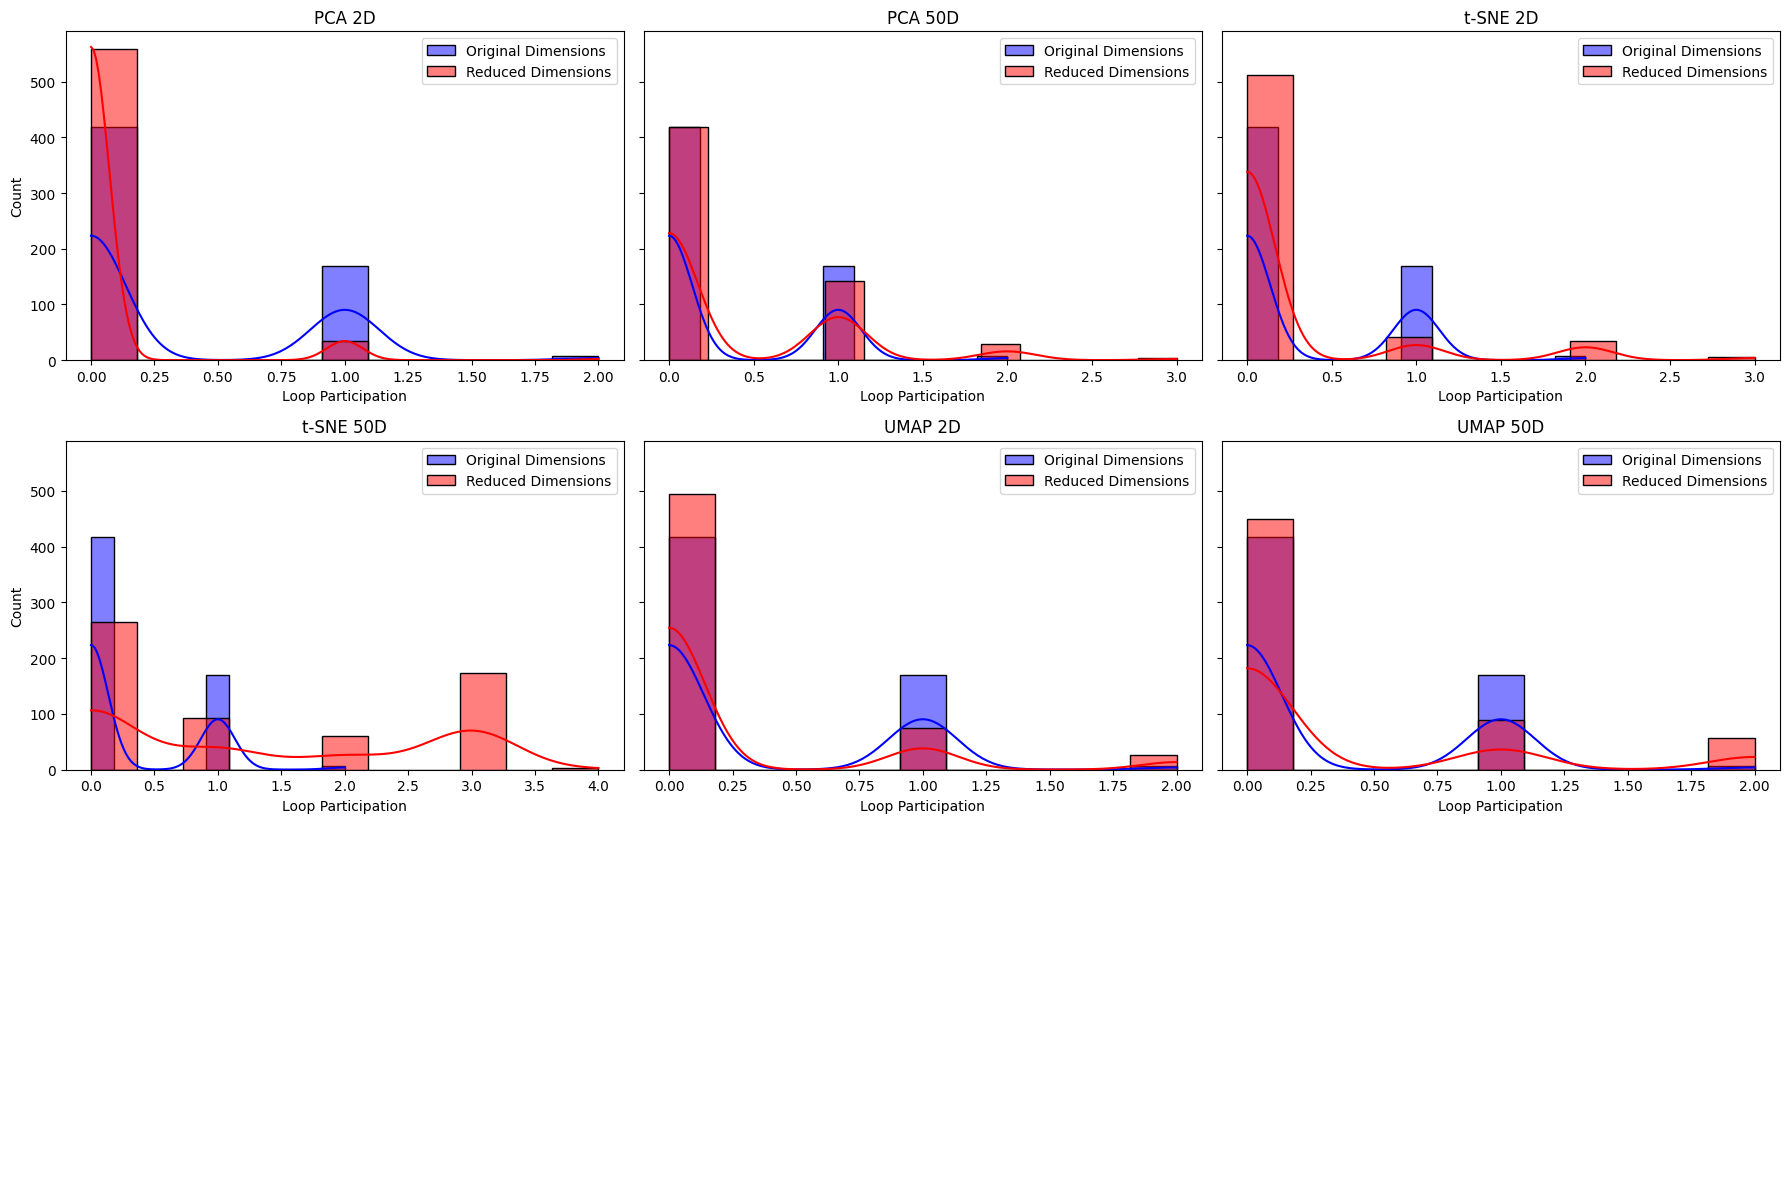

In [128]:
# Example input: list of 6 DataFrames, each with columns ['in_hd', 'in_pca']
dfs = [comparison_data_pca_2d, comparison_data_pca_50d, comparison_data_tsne_2d,
       comparison_data_tsne_50d, comparison_data_umap_2d, comparison_data_umap_50d]  # Replace with actual data
titles = [
    "PCA 2D", "PCA 50D", "t-SNE 2D",
    "t-SNE 50D", "UMAP 2D", "UMAP 50D"
]


fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharey=True)
axes = axes.flatten()  # Flatten 2D array of axes to 1D list

for i in range(9):
    if i < len(dfs):
        df = dfs[i]
        sns.histplot(data=df, x="in_hd", color="blue", label="Original Dimensions", kde=True, ax=axes[i])
        sns.histplot(data=df, x="in_pca", color="red", label="Reduced Dimensions", kde=True, ax=axes[i])
        axes[i].set_title(titles[i])
        axes[i].set_xlabel("Loop Participation")
        axes[i].legend()
    else:
        axes[i].axis("off")  # Turn off unused subplot

axes[0].set_ylabel("Count")
plt.tight_layout()
plt.show()

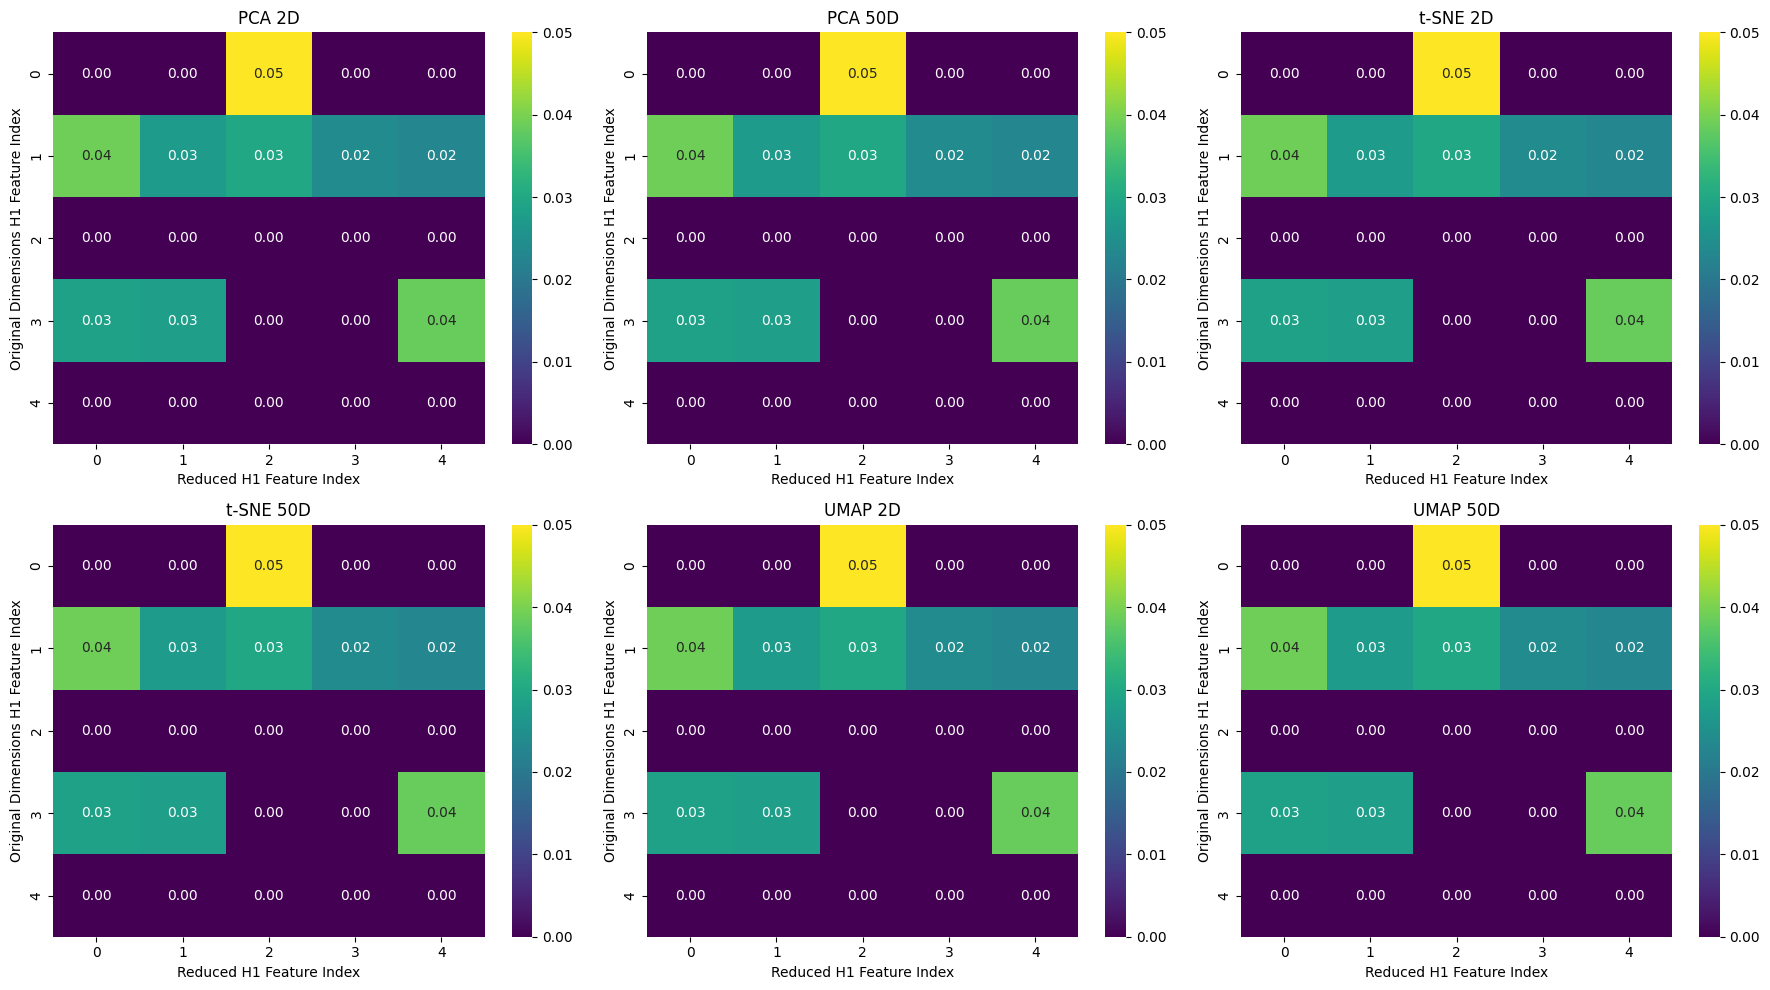

In [129]:
matrices = [jac_matrix_pca_2d, jac_matrix_pca_50d, jac_matrix_tsne_2d,
            jac_matrix_tsne_50d, jac_matrix_umap_2d, jac_matrix_umap_50d]

titles = [
    "PCA 2D", "PCA 50D", "t-SNE 2D",
    "t-SNE 50D", "UMAP 2D", "UMAP 50D"
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for ax, mat, title in zip(axes.flat, matrices, titles):
    sns.heatmap(mat, ax=ax, annot=True, fmt=".2f", cmap="viridis")
    ax.set_title(title)
    ax.set_xlabel("Reduced H1 Feature Index")
    ax.set_ylabel("Original Dimensions H1 Feature Index")

plt.tight_layout()
plt.show()